## Loading Library

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)


!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 4** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [6]:
#1
# load the data set ans show the first five transaction
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/bread%20basket%20(1).csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [7]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
#3 check missing values
df.isnull().sum()

,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a **clean dataset with complete entries and no missing values across all five columns**.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/tmp/ipython-input-1866678379.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


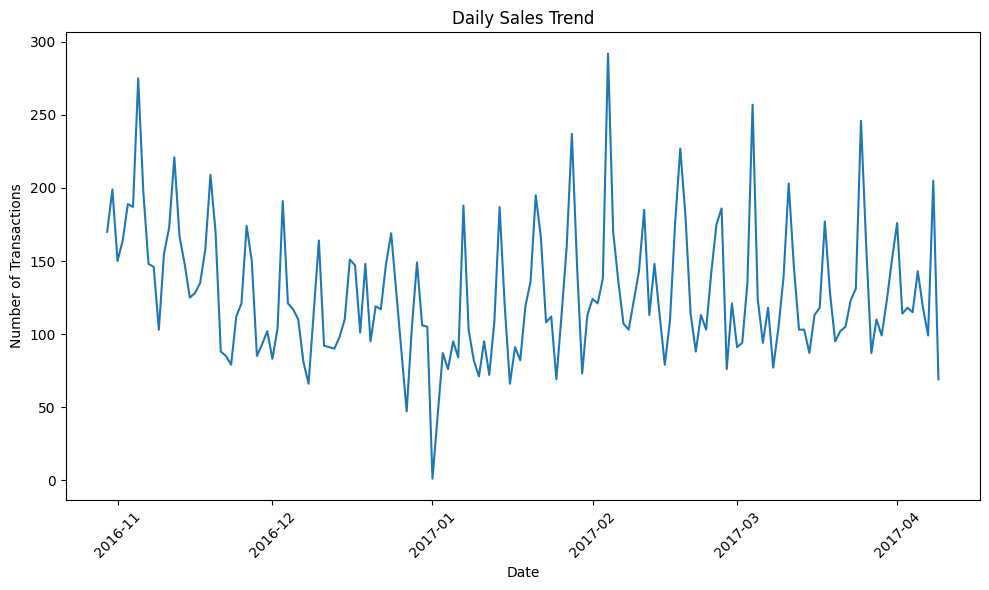

In [9]:
# 5
# --- 1. Extract date and hour from date_time ---
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = df['date_time'].dt.date
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].dt.day_name()

# --- 2. Group by date to get daily transaction counts ---
daily_sales = df.groupby('date').size()

# --- 3. Plot Daily Sales Trend ---
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [10]:
# 6
# Drop the 'date', 'hour', and 'weekday' columns
df = df.drop(columns=['date', 'hour', 'weekday'])

# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract components
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

# Show sample rows
df.sample(5)

,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
5285,2618,Cookies,2016-12-04 14:46:00,afternoon,weekend,4,12,2016,14:46:00,14,Sunday
7695,3880,Bread,2016-12-28 10:57:00,morning,weekday,28,12,2016,10:57:00,10,Wednesday
7600,3829,Coffee,2016-12-24 13:47:00,afternoon,weekend,24,12,2016,13:47:00,13,Saturday
4694,2309,Bread,2016-11-29 15:34:00,afternoon,weekday,29,11,2016,15:34:00,15,Tuesday
897,451,Jam,2016-11-04 09:22:00,morning,weekday,4,11,2016,09:22:00,9,Friday



Alright, now I can easily create a visualization of monthly sales.

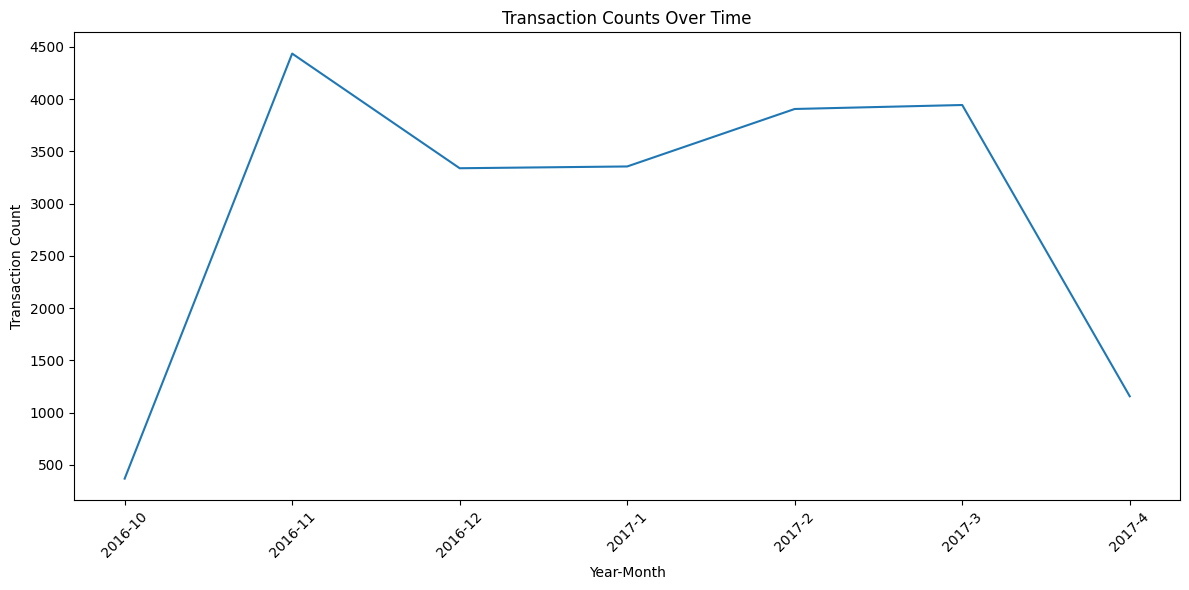

In [11]:
# 7
# Group by Year-Month
monthly_counts = df.groupby(df['date_time'].dt.to_period('M')).size()

# Format index as "YYYY-M" (remove leading zeros)
monthly_counts.index = [
    f"{p.year}-{p.month}" for p in monthly_counts.index
]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8. Now, the visualization above provides better insights: **showing how transaction volumes fluctuate across months, highlighting strong peaks during November 2016 and early 2017, followed by a gradual decline toward April 2017. This trend helps identify seasonal demand patterns, periods of high customer activity, and potential slow months that may require targeted promotions or operational adjustments.**

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [12]:
#9
# Extract unique day names for weekdays and weekends
unique_weekdays = df[df['weekday_weekend'] == 'weekday']['day_name'].unique()
unique_weekends = df[df['weekday_weekend'] == 'weekend']['day_name'].unique()

print("Unique weekday names:", unique_weekdays)
print("Unique weekend names:", unique_weekends)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [13]:
#10
# Create the aggregation (pivot table)
pivot_table = df.pivot_table(
    index='month',
    columns='day_name',
    values='Transaction',
    aggfunc='count',
    fill_value=0
)

# Sort columns in desired weekday order
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(columns=desired_order)

pivot_table


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is **that weekends consistently generate the highest transaction volumes across most months, especially on Saturdays, while weekday activity remains more stable and lower, indicating strong customer traffic peaks during weekends.**


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

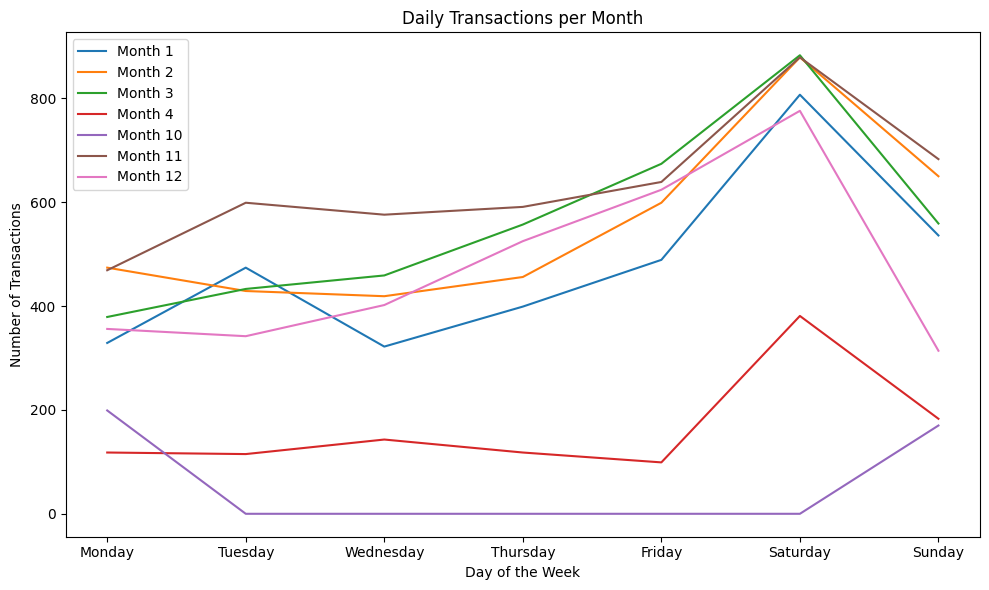

In [14]:
# 12
# Create pivot table for the visualization
pivot_viz = df.pivot_table(
    index=df['date_time'].dt.month,
    columns=df['date_time'].dt.day_name(),
    values='Transaction',
    aggfunc='count',
    fill_value=0
)

# Sort columns in weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_viz = pivot_viz.reindex(columns=weekday_order)

# Plot the comparison
plt.figure(figsize=(10, 6))

for month in pivot_viz.index:
    plt.plot(weekday_order, pivot_viz.loc[month], label=f"Month {month}")

plt.title("Daily Transactions per Month")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.legend()
plt.tight_layout()
plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that **weekends, especially Saturdays, consistently generate the highest transactions across almost all months, while weekdays show more moderate and stable activity, highlighting clear peaks in customer behavior toward the end of the week.**

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [15]:
# 14
# Check unique values in the period_day column
df['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [16]:
# 15
# Get unique hours for each period of the day
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

print("Unique morning_hour:",morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

**Yes, there is something odd: the “morning” period unexpectedly includes hour 1 (1 AM), which logically belongs to nighttime, not morning. Morning hours should typically start around 6–11 AM, but the data labels 1 AM as “morning.” This suggests that the period_day categories were assigned inconsistently or incorrectly in the original dataset.**


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

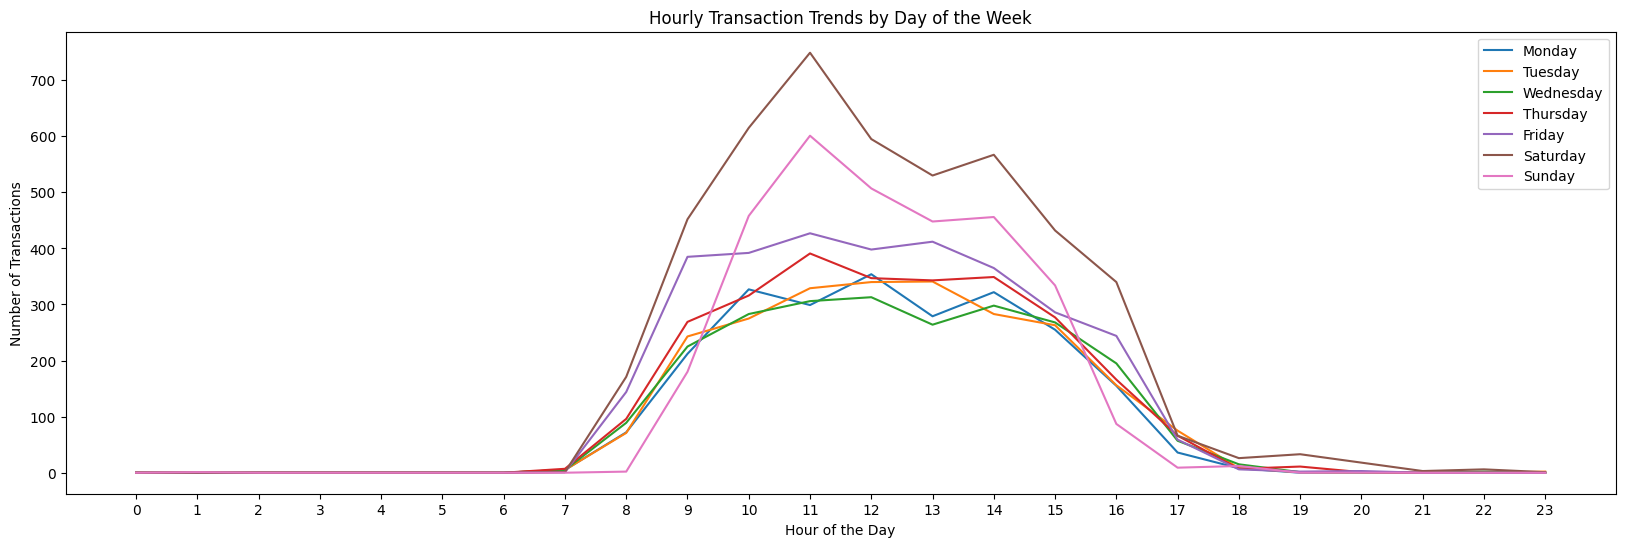

In [17]:
# 17
hourly = df.groupby(['day_name', 'hour']).size().reset_index(name='count')

plt.figure(figsize=(20, 6))

for day in weekday_order:
    data = hourly[hourly['day_name'] == day]
    data = data.set_index('hour').reindex(range(24), fill_value=0)
    plt.plot(range(24), data['count'], label=day)

plt.title("Hourly Transaction Trends by Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.legend()

plt.xticks(range(24))
plt.grid(False)
plt.show()

18. The daily sales trend plot reveals that **customer activity consistently peaks between 9 AM and 2 PM across all days, with Saturday showing the highest spike overall, while early morning and late evening hours experience very few transactions.**

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

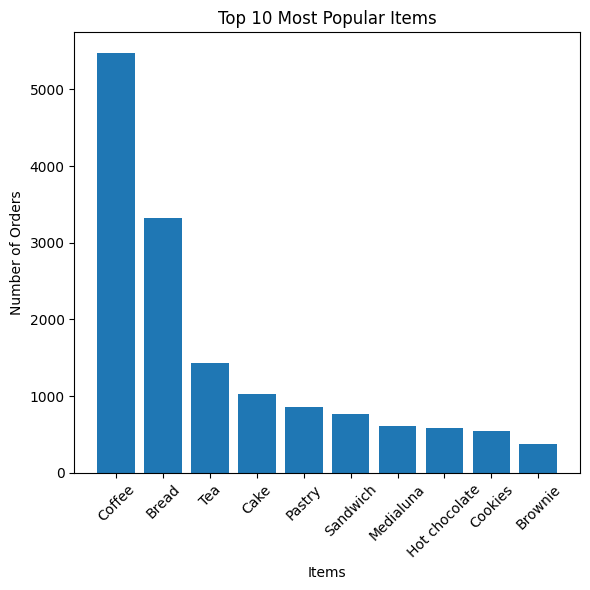

In [18]:
# 19
# Count item frequencies
item_counts = df['Item'].value_counts().head(10)

# Plot the top 10 most popular items
plt.figure(figsize=(6, 6))
plt.bar(item_counts.index, item_counts.values)
plt.title("Top 10 Most Popular Items")
plt.xlabel("Items")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

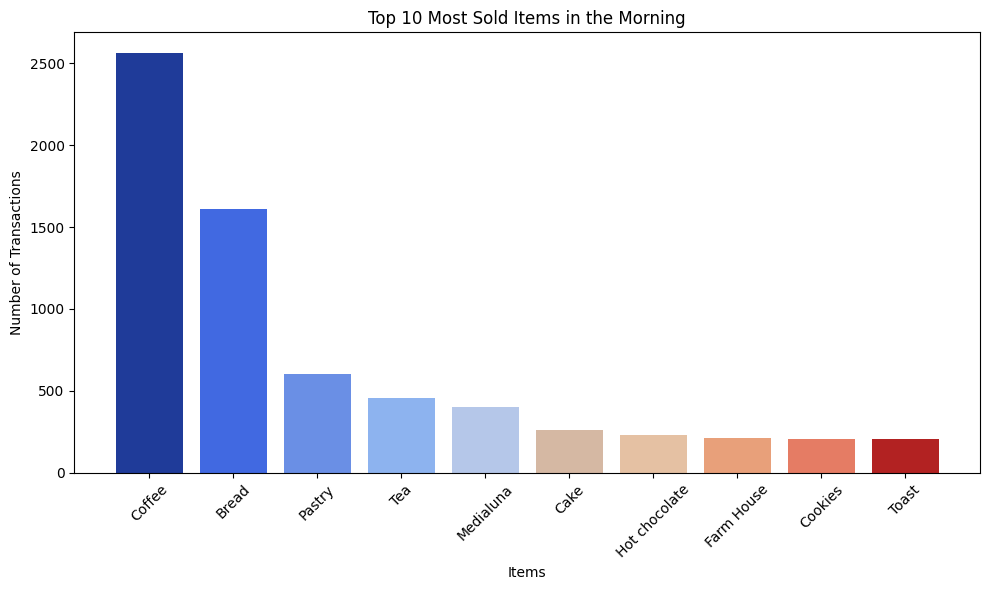

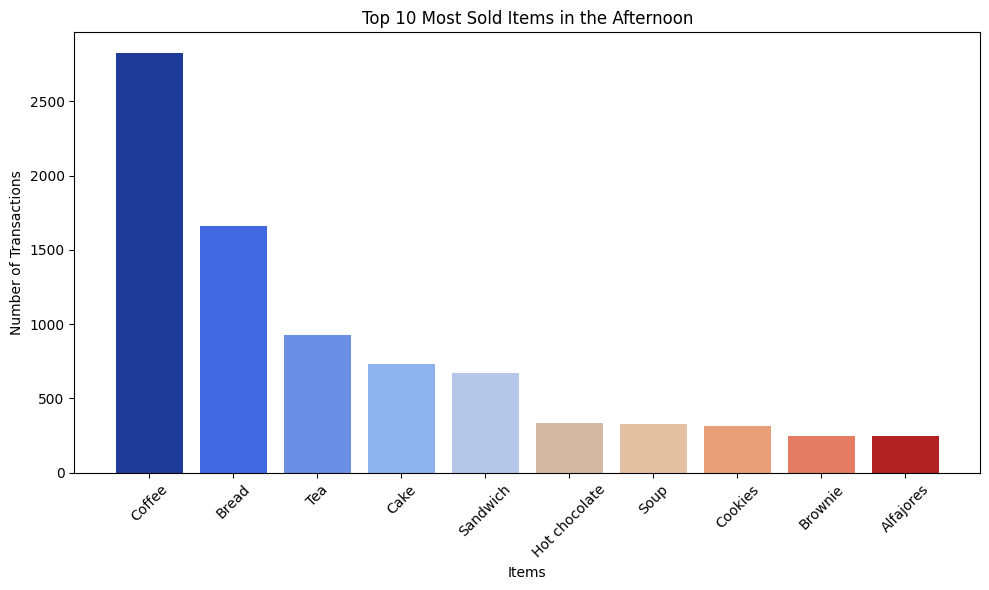

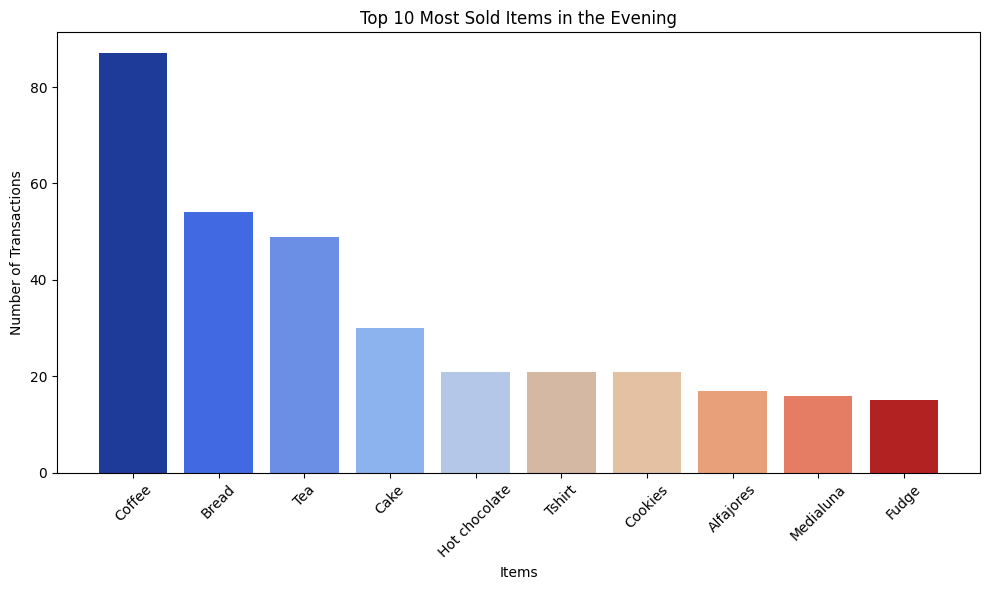

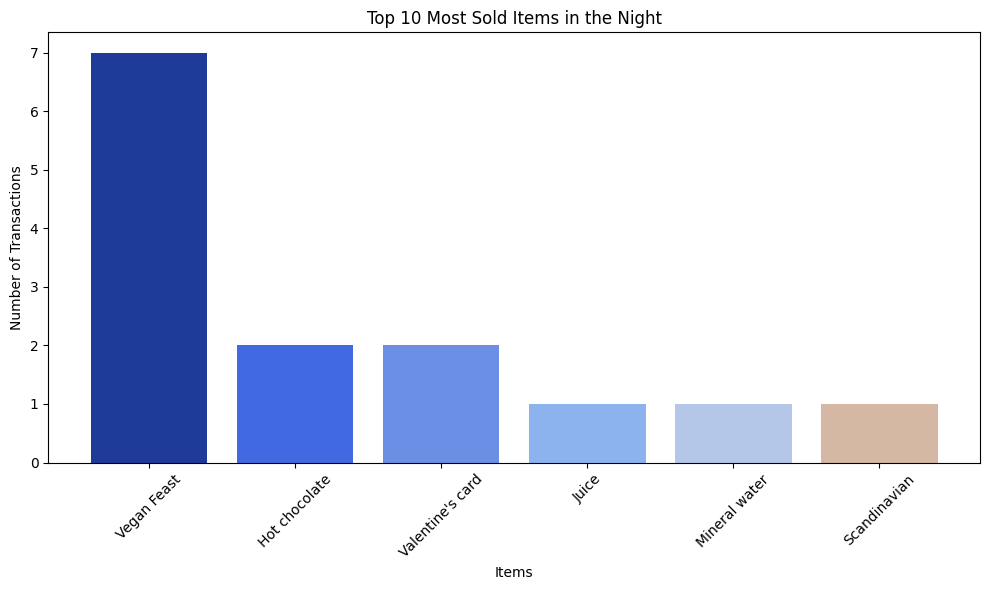

In [19]:
# 20
# Define periods
periods = {
    "morning": df[df['period_day'] == "morning"],
    "afternoon": df[df['period_day'] == "afternoon"],
    "evening": df[df['period_day'] == "evening"],
    "night": df[df['period_day'] == "night"]
}

# Color palette
colors = [
    "#1f3b99", "#4169e1", "#6a8fe5", "#8db3ef", "#b5c7e9",
    "#d5b8a3", "#e5c1a3", "#e8a07a", "#e57c64", "#b22222"
]

import matplotlib.pyplot as plt

# Plot top 10 items for each period
for period_name, period_df in periods.items():

    top_items = period_df['Item'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(top_items.index, top_items.values, color=colors[:len(top_items)])
    plt.title(f"Top 10 Most Sold Items in the {period_name.capitalize()}")
    plt.xlabel("Items")
    plt.ylabel("Number of Transactions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

21. It turns out that there is something different in the plot above, the insight is **that the types of items customers buy change noticeably across different times of the day: mornings and afternoons are busy and dominated by staple items like coffee and bread, while evenings show far fewer purchases and a different set of popular items, and nighttime sales drop sharply with only a small number of unique, low-frequency items being ordered.**

I found a valentine card, I was curious about when people bought it so I made a visualization of it

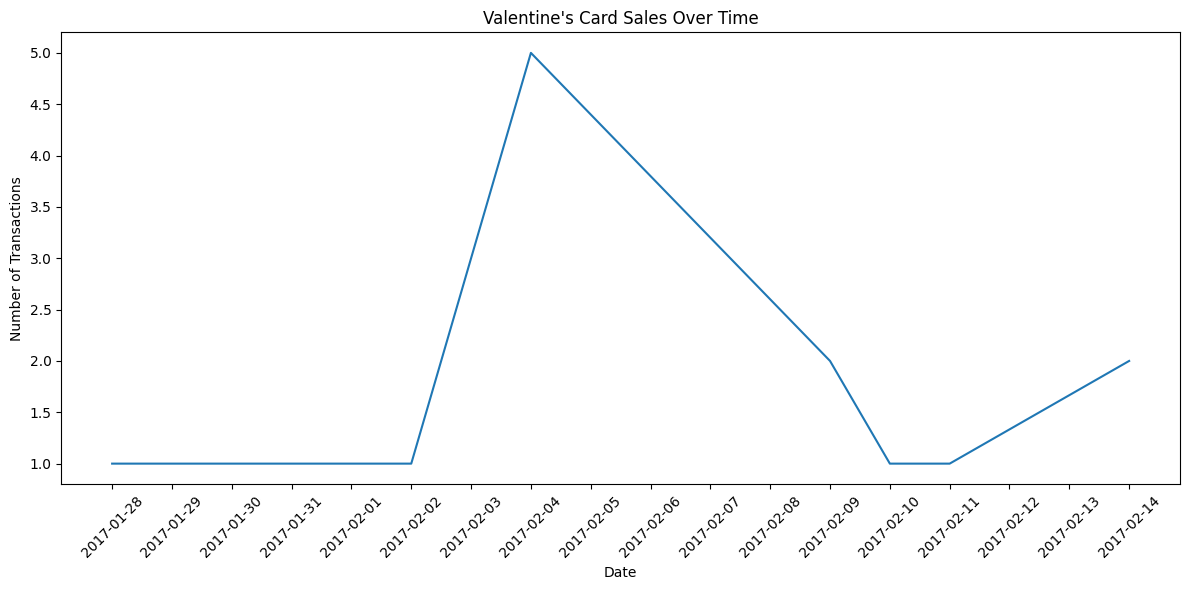

In [20]:
#22
# Filter for Valentine's card
valentine_df = df[df['Item'] == "Valentine's card"]

# Group by date
valentine_sales = valentine_df.groupby(valentine_df['date_time'].dt.date).size()

# Create full date list from min to max date
full_dates = pd.date_range(start="2017-01-28", end="2017-02-14")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(valentine_sales.index, valentine_sales.values)

plt.title("Valentine's Card Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

plt.xticks(full_dates, rotation=45)

plt.tight_layout()
plt.show()

23. I found the insight from the sale of the Valentine's cards above is **that customers begin purchasing Valentine’s cards several days before February 14, with a clear spike around February 4–5, followed by a gradual decline as the holiday approaches. This shows that most buyers prepare ahead of time instead of buying at the last minute.**


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [44]:
#24
# Grouping items by transaction
basket = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# 25
# Convert quantities to 1 and 0
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket = basket.astype(int)
df2 = basket # Assign to df2 for the apriori function

df2.head()

/tmp/ipython-input-2477694395.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. Apriori: (min_support=0.02), Association Rules: (metric="lift", min_threshold=1)

In [46]:
# 26
basket = df.groupby('Transaction')['Item'].apply(list)
basket.head()
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

df_apriori = apriori(df2, min_support=0.02, use_colnames=True)
df_apriori

,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [47]:
# 27
df_ar = association_rules(df_apriori, metric = "lift", min_threshold = 1)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
2,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
4,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Through this analysis, I discovered clear customer behavior patterns across time, products, and purchasing combinations. Transaction trends revealed that weekends—especially Saturdays—consistently experience the highest traffic, while weekday sales remain more moderate. Hourly sales patterns showed strong peaks between late morning and early afternoon, confirming the bakery’s busiest operating window. When analyzing item popularity, staple products such as Coffee, Bread, and Pastry emerged as top sellers across most periods, while niche items only appeared during specific times like evening or night. Seasonal behavior was also evident, as seen in the spike of Valentine’s card purchases in the days leading up to February 14. Finally, the Apriori analysis uncovered meaningful product associations, such as how items like Pastry and Bread or Coffee and Cake frequently appear together, offering opportunities for strategic bundling and targeted promotions. Altogether, these insights provide a deeper understanding of customer preferences and can be used to optimize inventory, staffing, marketing strategies, and store layout to better align with actual consumer demand.